## Common imports and download MNIST

In [31]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [32]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [33]:
y.shape

(70000,)

## Show image using matplotlib

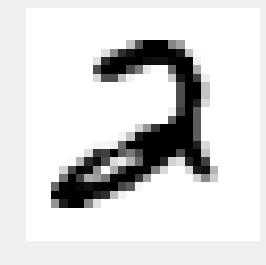

In [34]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(X[15000])

## Plot several digits

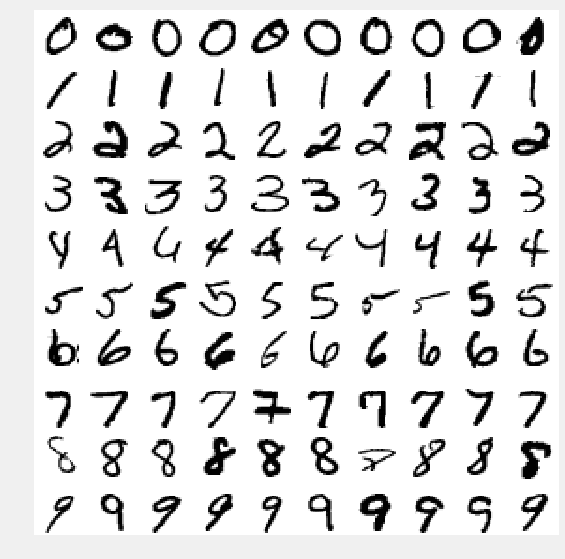

In [35]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

## Function to shift images one pixel in each direction
This will artificially increase the dataset size by 5x

In [44]:
numX = np.arange(20)
numX2 = np.reshape(x,(4,5))
numX2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [60]:
# Shift up one pixel
xShiftUp = np.roll(numX2,-1)
for i in range(4):
    xShiftUp[i][4] = 0
    
np.concatenate(([numX2],[xShiftUp]))

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[ 1,  2,  3,  4,  0],
        [ 6,  7,  8,  9,  0],
        [11, 12, 13, 14,  0],
        [16, 17, 18, 19,  0]]])

In [41]:
# Separate orginal train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create new train set where new images can be appended
X_new_train, y_new_train = X_train, y_train

In [69]:
# Shift 1 pixel to the left
for i in range(1000):
    shiftedArray = np.roll(X_train[i], -1)   
    X_new_train = np.concatenate((X_new_train,[shiftedArray]))
    
X_new_train.shape

(61000, 784)

## Create images with noise